In [1]:
import gymnasium
import highway_env

from matplotlib import pyplot as plt
from utils import record_videos, show_videos





In [2]:
config={
    "render_agent":False,
    "right_lane_reward":0.2,
    "high_speed_reward":1.2,
    "collision_reward":-0.5,
    "vehicles_count": 30
}
env = gymnasium.make('highway-fast-v0',max_episode_steps=-1,config=config)
env.unwrapped.config

{'observation': {'type': 'Kinematics'},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 5,
 'policy_frequency': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': False,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 3,
 'vehicles_count': 30,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 30,
 'ego_spacing': 1.5,
 'vehicles_density': 1,
 'collision_reward': -0.5,
 'right_lane_reward': 0.2,
 'high_speed_reward': 1.2,
 'lane_change_reward': 0,
 'reward_speed_range': [20, 30],
 'normalize_reward': True,
 'offroad_terminal': False}

In [3]:
from algorithms.Agent import Agent
from algorithms.RDQN import RDQN

# agent = TestAgent(env)


agent: Agent = RDQN(env)

Using cuda


In [4]:
NUM_EPISODES = 4000
total_rewards = []
discounted_rewards = []

for episode in range(NUM_EPISODES):
    print(f"Episode {episode}")
    
    total_reward = 0
    discounted_reward = 0 
    gamma_pow = 1.0       
    
    done = truncated = False
    obs, info = env.reset()
    
    while not (done or truncated):
        action = agent.predict(obs.flatten())

        next_obs, reward, done, truncated, info = env.step(action)
        
        total_reward += reward
        
        discounted_reward += reward * gamma_pow
        gamma_pow *= agent.gamma # Decay the discount factor
        
        agent.learn(obs.flatten(), action, reward, (done, next_obs.flatten()))

        obs = next_obs
        
    total_rewards.append(total_reward)
    discounted_rewards.append(discounted_reward)
    
    print(f"Total Reward: {round(total_reward, 2)} | Discounted: {round(discounted_reward, 2)}")

Episode 0
Total Reward: 2.85 | Discounted: 2.56
Episode 1


KeyboardInterrupt: 

In [5]:
# agent.save_model("main2.tar")
agent.load_model("main.tar")


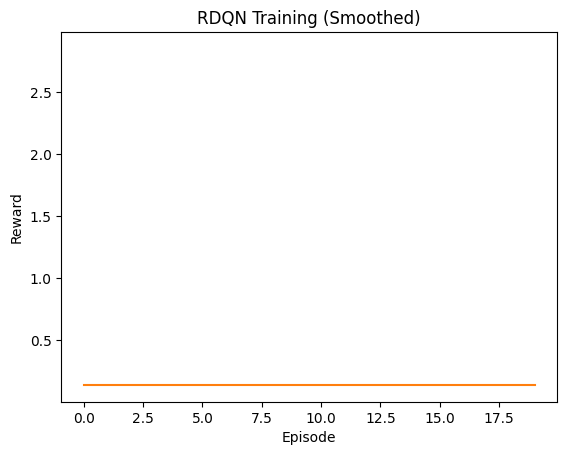

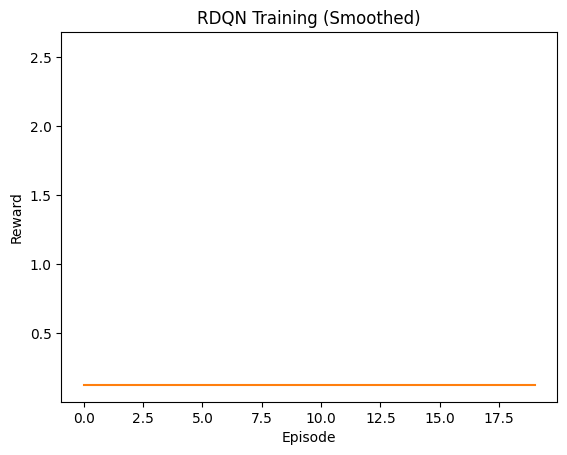

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rewards(rewards):

    window = 20
    smoothed = np.convolve(rewards, np.ones(window)/window, mode='valid')


    plt.plot(rewards, alpha=0.3)
    plt.plot(smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Reward")
    plt.title("RDQN Training (Smoothed)")
    plt.show()

plot_rewards(total_rewards)
plot_rewards(discounted_rewards)




In [ ]:
from gymnasium.wrappers import RecordVideo
NUM_EPISODES = 3
total_rewards = []
env = gymnasium.make('highway-v0', render_mode='rgb_array',config={"duration":40,"vehicles_count": 50})
# env = RecordVideo(env, video_folder="run",
#               episode_trigger=lambda e: True)
# env.unwrapped.set_record_video_wrapper(env)

agent.eval()


for episode in range(NUM_EPISODES):
  print(f"Episode {episode}")
  done = truncated = False

  obs, info = env.reset()
  
  while not (done or truncated):
    action = agent.predict(obs.flatten())

    next_obs, reward, done, truncated, info = env.step(action)
    print(info)
    obs=next_obs
    env.render()
env.close()
# show_videos()


Episode 0
{'speed': 29.1455588268693, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': np.float64(0.9145558826869301), 'on_road_reward': 1.0}}
{'speed': 25.70842722946251, 'crashed': False, 'action': 4, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': np.float64(0.5708427229462512), 'on_road_reward': 1.0}}
{'speed': 25.121061878603935, 'crashed': False, 'action': 1, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': np.float64(0.5121061878603935), 'on_road_reward': 1.0}}
{'speed': 29.16624687758445, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.3333333333333333, 'high_speed_reward': np.float64(0.9166246877584449), 'on_road_reward': 1.0}}
{'speed': 29.857521400796376, 'crashed': False, 'action': 3, 'rewards': {'collision_reward': 0.0, 'right_lane_reward': 0.333333333

: 